# Stepwise linear regression example

**Example using the stepwise linear regression function in the stepAIC module**

### Stepwise

The **stepwise** function in the stepAIC module has the option to use either forward selection (default), backward selection, or all subsets of possible combinations for the optimum set of predictor variables as follows:

- Forward selection (default) starts with no predictors and adds predictors as long as it improves the model (reduces AIC or BIC, or increases adjusted rsquared)
- Backward selection starts with all predictors and removes predictors as long as it improves the model (reduces AIC or BIC, or increases adjusted rsquared)
- All subsets of possible combinations of predictor features to find the best of all possible models (up to 20 candidate predictors)

Either the AIC, BIC, or adjusted rsquared may be used as the criterion with forward, backward, or all subsets. In addition, there is an option to find all features with p-values less than a signficance threshold through backward elimination based only on the p-values of the coefficients. The stepwise algorithm also has the option (default) to remove any non-signficant predictors after either a forward, backward, or all subsets search using the AIC, BIC, or adjusted rsquared criterion.

The **stepwise** function does not standardizes the X input by default. The X inputs can be standardized as an option using keyword argument standardize='on'. 

This example shows how to test the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

Before running this notebook, first install the stepAIC module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [ ]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

## Read X and y from the sklearn diabetes data set

In [1]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into training and testing subsets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting Stepwise models, please wait ...


Model skill and features at each step in model_outputs['step_features']:

|   Step |     AIC |     BIC |   rsq_adj | Features                          |
|-------:|--------:|--------:|----------:|:----------------------------------|
|      0 | 4079.17 | 4083.03 |  0        | []                                |
|      1 | 3920.45 | 3928.19 |  0.363917 | ['bmi']                           |
|      2 | 3866.73 | 3878.33 |  0.455249 | ['bmi' 's5']                      |
|      3 | 3852.19 | 3867.66 |  0.478697 | ['bmi' 's5' 'bp']                 |
|      4 | 3843.12 | 3862.46 |  0.493337 | ['bmi' 's5' 'bp' 's1']            |
|      5 | 3838.21 | 3861.4  |  0.501738 | ['bmi' 's5' 'bp' 's1' 's2']       |
|      6 | 3829.52 | 3856.59 |  0.515192 | ['bmi' 's5' 'bp' 's1' 's2' 'sex'] |
|      7 | 3829.52 | 3856.59 |  0.515192 | ['bmi' 's5' 'bp' 's1' 's2' 'sex'] |

Final forward model after removing insignficant features if any:
Best features:  ['bmi', 's5

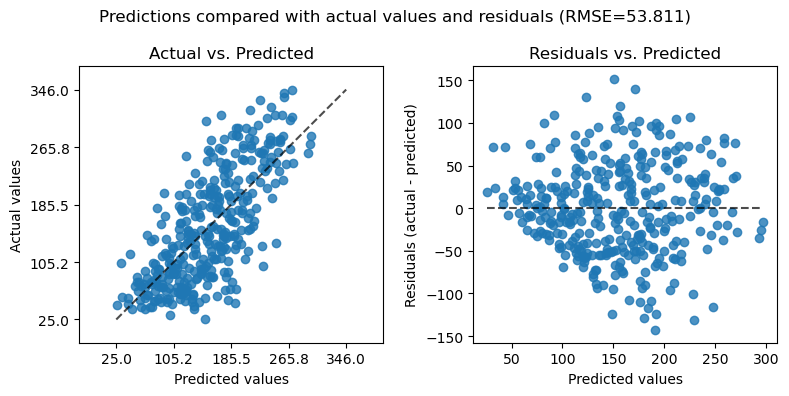

In [3]:
# Use the stacking function in the stepAIC module
from stepAIC import stepwise
train_model, train_output = stepwise(X_train, y_train)

## Test the model with the testing data subset

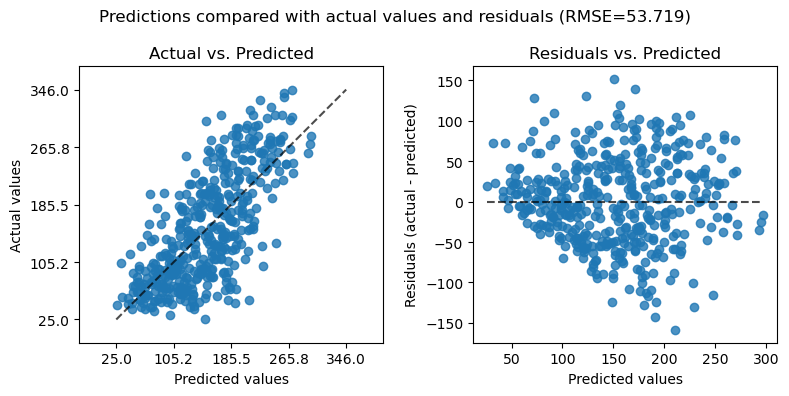

In [11]:
import statsmodels.api as sm
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt
import numpy as np
selected_features = train_output['selected_features']
y_pred = train_model.predict(sm.add_constant(X[selected_features]))
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred,
    kind="residual_vs_predicted",
    ax=axs[1]
)
axs[1].set_title("Residuals vs. Predicted")
rmse = np.sqrt(np.mean((y-y_pred)**2))
fig.suptitle(
    f"Predictions compared with actual values and residuals (RMSE={rmse:.3f})")
plt.tight_layout()
plt.savefig("Stepwise_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting Stepwise models, please wait ...


Model skill and features at each step in model_outputs['step_features']:

|   Step |     AIC |     BIC |   rsq_adj | Features                          |
|-------:|--------:|--------:|----------:|:----------------------------------|
|      0 | 5096.33 | 5100.42 |  0        | []                                |
|      1 | 4912.04 | 4920.22 |  0.342433 | ['bmi']                           |
|      2 | 4828.4  | 4840.67 |  0.457023 | ['bmi' 's5']                      |
|      3 | 4813.23 | 4829.59 |  0.476521 | ['bmi' 's5' 'bp']                 |
|      4 | 4804.96 | 4825.42 |  0.487366 | ['bmi' 's5' 'bp' 's1']            |
|      5 | 4800.08 | 4824.63 |  0.494125 | ['bmi' 's5' 'bp' 's1' 'sex']      |
|      6 | 4788.6  | 4817.24 |  0.508193 | ['bmi' 's5' 'bp' 's1' 'sex' 's2'] |
|      7 | 4788.6  | 4817.24 |  0.508193 | ['bmi' 's5' 'bp' 's1' 'sex' 's2'] |

Final forward model after removing insignficant features if any:
Best features:  ['bmi', 's5

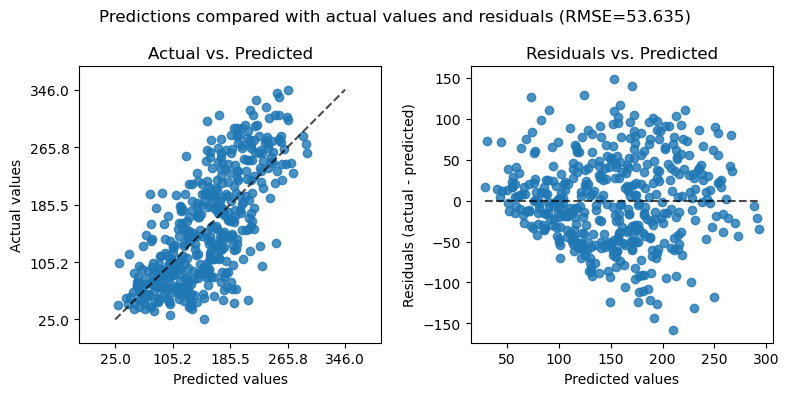

In [5]:
from stepAIC import stepwise
final_model, final_output = stepwise(X, y)

## User instructions

In [6]:
help(stepwise)

Help on function stepwise in module stepAIC:

stepwise(X, y, **kwargs)
    Python function for stepwise linear regression to minimize AIC or BIC
    and eliminate non-signficant predictors

    by
    Greg Pelletier
    gjpelletier@gmail.com
    17-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        criterion= 'aic' (default) or 'bic' where
            'aic': use the Akaike Information Criterion to score the model
            'bic': use the Bayesian Information Criterion to score the model
            'r2': use the adjusted r-squared to score the model
            'p_coef': use p-values of coefficients to select features
                using p_coef  as criterion automatically uses backwa